## 1. Introduction
    Predicting house prices is a rapidly evolving and challenging task due to various market dynamics. Houston is currently a hot housing market, making it particularly interesting to analyze and predict home prices. I am planning to develop a model that exclusively employs supervised learning techniques to learn from historical data and accurately forecast target variable home prices.This model will leverage insights from past transactions and relevant features to provide reliable predictions for prospective buyers and sellers.

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of housing prices data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/opashroanld/housing-houston-and-miami 

  *   #### Download data and load it to dataframe

In [230]:
# download the dataset from kaggle
!export KAGGLE_USERNAME='' # add kaggle username
!export KAGGLE_KEY='' # add kaggle key for the user
!curl -L -o housing-prices-dataset.zip\
https://www.kaggle.com/api/v1/datasets/download/opashroanld/housing-houston-and-miami
!unzip housing-prices-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1003k  100 1003k    0     0   604k      0  0:00:01  0:00:01 --:--:-- 1311k
Archive:  housing-prices-dataset.zip
replace Houston.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [233]:
import pandas as pd
houston_home_prices_df=pd.read_csv('Houston.csv')

* ####  Perform EDA on the houston housing price data
  
  * Clean the data
  * Check for outliers and apply appropriate fixes
  * check for any nulls missing values and apply appropriate fixes

In [235]:
# print the information and head to see the data and types
houston_home_prices_df.info()
print(houston_home_prices_df.head())
print(houston_home_prices_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13546 entries, 0 to 13545
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13192 non-null  float64
 1   Bedrooms    13192 non-null  float64
 2   Bathrooms   13192 non-null  float64
 3   Car         13192 non-null  float64
 4   sqm_house   13192 non-null  float64
 5   Balcony     13192 non-null  float64
 6   Year_built  13546 non-null  int64  
 7   Address     13546 non-null  object 
 8   Latitude    13546 non-null  float64
 9   Longitude   13546 non-null  float64
 10  Zipcode     13546 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.1+ MB
       Price  Bedrooms  Bathrooms  Car  sqm_house  Balcony  Year_built  \
0  1328655.0       9.0        4.0  6.0      470.0      3.0        1977   
1   826553.0       8.0        5.0  5.0      208.0      3.0        2002   
2  1133566.0       2.0        1.0  2.0      564.0      2.0        1982   


In [236]:
# Now look at the categorical variable object type
houston_home_prices_df['Address'].nunique()


13546

In [237]:
# address is unique for each record , so we drop that column
cleaned_home_prices_df = houston_home_prices_df.drop('Address', axis=1, inplace=False)

In [238]:
# check for nulls and any missing values 
cleaned_home_prices_df.isnull().sum()

Price         354
Bedrooms      354
Bathrooms     354
Car           354
sqm_house     354
Balcony       354
Year_built      0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

In [239]:
# I want to drop the records for which the home price is null
cleaned_home_prices_df.dropna(subset=['Price'],inplace=True)

In [240]:
# check for nulls and any missing values 
cleaned_home_prices_df.isnull().sum()

Price           0
Bedrooms      325
Bathrooms     319
Car           314
sqm_house     333
Balcony       314
Year_built      0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

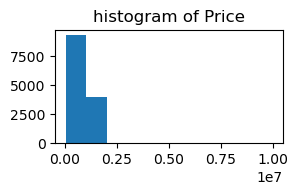

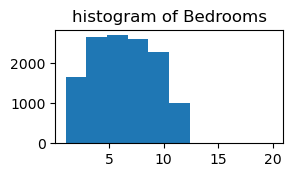

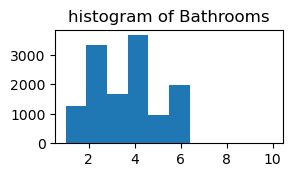

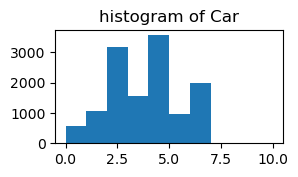

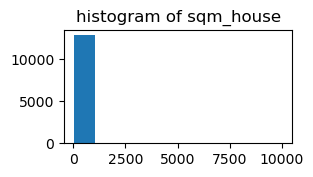

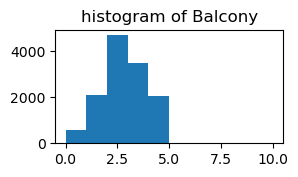

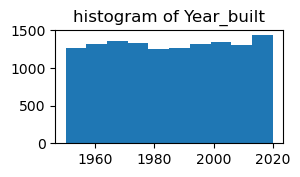

In [241]:
# plot the data before treating the nulls, and see distributions 
for column in cleaned_home_prices_df.columns: 
    if column in ('Zipcode','Address','Latitude','Longitude'):
        continue
    plt.figure(figsize=(10,5))
    # Histograms of the original data
    plt.subplot(3, 3, 1)
    plt.hist(cleaned_home_prices_df[column])
    plt.title(f"histogram of {column}")
    plt.show()

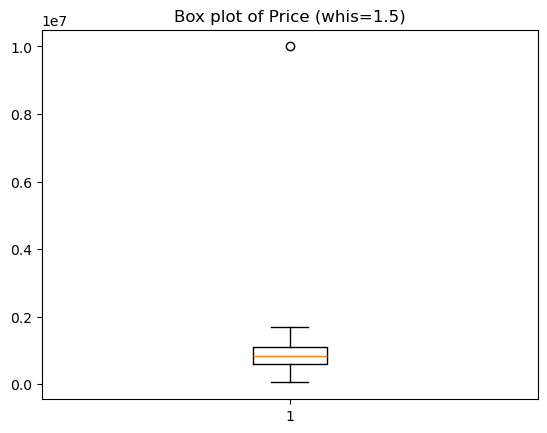

In [242]:
# car and Balcony having zero values , and it can be valid as missing the car , balcony 
# outlier plot sales price
plt.boxplot(cleaned_home_prices_df["Price"],whis=7.0)
plt.title("Box plot of Price (whis=1.5)")
plt.show()

In [243]:
#lets drop the outlier
cleaned_home_prices_df[cleaned_home_prices_df["Price"] >= 10000000].head() 
cleaned_home_prices_df = cleaned_home_prices_df.drop(cleaned_home_prices_df[cleaned_home_prices_df["Price"] >= 10000000].index)
cleaned_home_prices_df.shape

(13191, 10)

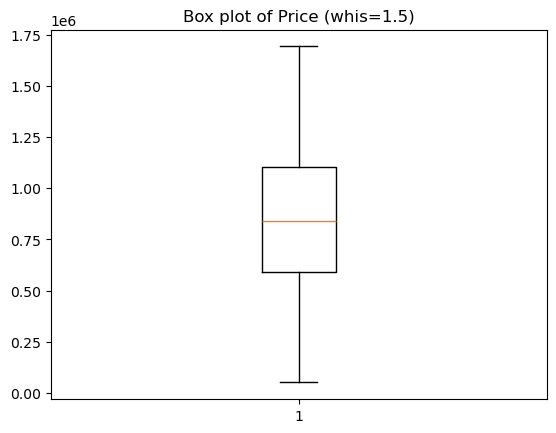

In [244]:
# replot price
plt.boxplot(cleaned_home_prices_df["Price"],whis=7.0)
plt.title("Box plot of Price (whis=1.5)")
plt.show()

In [248]:
# replace the missing values with a mean for Bedrooms,Bathrooms,Car,sqm_house,Balcony
# fill the mean for the sqm_house continuios variable and mod for ordinal variables
for column_name in ('sqm_house',):
    cleaned_home_prices_df[column_name].fillna(cleaned_home_prices_df[column_name].mean(), inplace=True)
for column_name in ('Bedrooms','Bathrooms','Car','Balcony'):
    cleaned_home_prices_df[column_name].fillna(cleaned_home_prices_df[column_name].mode()[0], inplace=True)
cleaned_home_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13191 entries, 0 to 13542
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13191 non-null  float64
 1   Bedrooms    13191 non-null  float64
 2   Bathrooms   13191 non-null  float64
 3   Car         13191 non-null  float64
 4   sqm_house   13191 non-null  float64
 5   Balcony     13191 non-null  float64
 6   Year_built  13191 non-null  int64  
 7   Latitude    13191 non-null  float64
 8   Longitude   13191 non-null  float64
 9   Zipcode     13191 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


In [250]:
cleaned_home_prices_df.head()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
0,1328655.0,9.0,4.0,6.0,470.0,3.0,1977,29.799693,-95.396527,77001
1,826553.0,8.0,5.0,5.0,208.0,3.0,2002,29.735212,-95.435717,77001
2,1133566.0,2.0,1.0,2.0,564.0,2.0,1982,29.751218,-95.369976,77001
3,814179.0,8.0,5.0,4.0,216.0,3.0,1986,29.721105,-95.356369,77002
4,1020010.0,7.0,4.0,4.0,347.0,3.0,2003,29.783241,-95.362663,77005


In [251]:
# now looks at the data distributions
cleaned_home_prices_df.describe(percentiles=np.arange(0,.99,.05))

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
count,1.319100e+04,13191.000000,13191.000000,13191.000000,13191.000000,13191.000000,13191.000000,13191.000000,13191.000000,13191.000000
mean,8.449821e+05,6.136987,3.454477,3.366614,316.770260,2.329467,1984.922068,29.749685,-95.399913,77002.980744
std,3.594042e+05,2.840937,1.541698,1.662845,149.730659,1.057632,20.448537,0.029004,0.028859,1.408173
min,5.040400e+04,1.000000,1.000000,0.000000,50.000000,0.000000,1950.000000,29.700002,-95.449994,77001.000000
0%,5.040400e+04,1.000000,1.000000,0.000000,50.000000,0.000000,1950.000000,29.700002,-95.449994,77001.000000
5%,2.368410e+05,2.000000,1.000000,1.000000,83.000000,1.000000,1953.000000,29.704802,-95.445012,77001.000000
10%,3.561440e+05,2.000000,2.000000,1.000000,110.000000,1.000000,1957.000000,29.709602,-95.439979,77001.000000
15%,4.519885e+05,3.000000,2.000000,2.000000,136.000000,1.000000,1960.000000,29.714681,-95.434930,77001.000000
20%,5.276760e+05,3.000000,2.000000,2.000000,163.000000,1.000000,1964.000000,29.719346,-95.429956,77001.000000
25%,5.924240e+05,4.000000,2.000000,2.000000,191.000000,2.000000,1967.000000,29.724362,-95.425225,77002.000000


## 3 Feature engineering

In [252]:
#Plot correlation matricx and it gives a bit of the relationship to target variable
cleaned_home_prices_df.corr()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
Price,1.000000,0.443944,0.469300,0.488043,0.680779,0.337470,-0.007928,0.010154,-0.008496,0.006853
Bedrooms,0.443944,1.000000,0.782957,0.746726,0.028904,0.585914,-0.012960,-0.001397,0.003673,0.000887
Bathrooms,0.469300,0.782957,1.000000,0.738339,0.036058,0.566926,-0.009097,-0.004724,-0.007454,-0.001032
Car,0.488043,0.746726,0.738339,1.000000,0.060669,0.537213,-0.019884,0.001006,-0.010040,0.002853
sqm_house,0.680779,0.028904,0.036058,0.060669,1.000000,0.036168,0.002354,0.012224,-0.000626,0.012824
Balcony,0.337470,0.585914,0.566926,0.537213,0.036168,1.000000,-0.009761,0.000140,-0.001201,-0.007499
Year_built,-0.007928,-0.012960,-0.009097,-0.019884,0.002354,-0.009761,1.000000,-0.000610,0.008915,-0.008298
Latitude,0.010154,-0.001397,-0.004724,0.001006,0.012224,0.000140,-0.000610,1.000000,-0.030340,0.013898
Longitude,-0.008496,0.003673,-0.007454,-0.010040,-0.000626,-0.001201,0.008915,-0.030340,1.000000,-0.003981
Zipcode,0.006853,0.000887,-0.001032,0.002853,0.012824,-0.007499,-0.008298,0.013898,-0.003981,1.000000


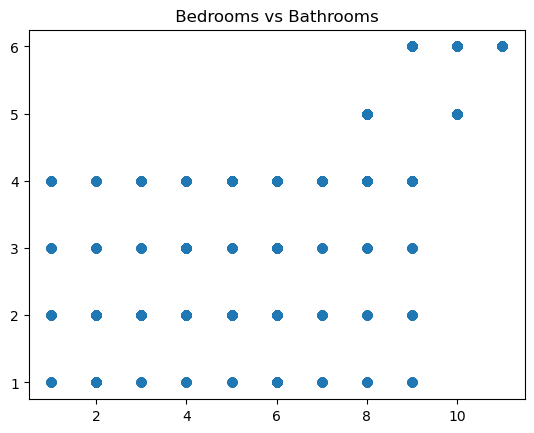

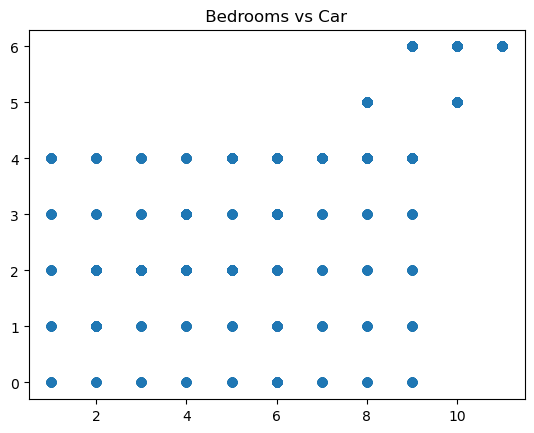

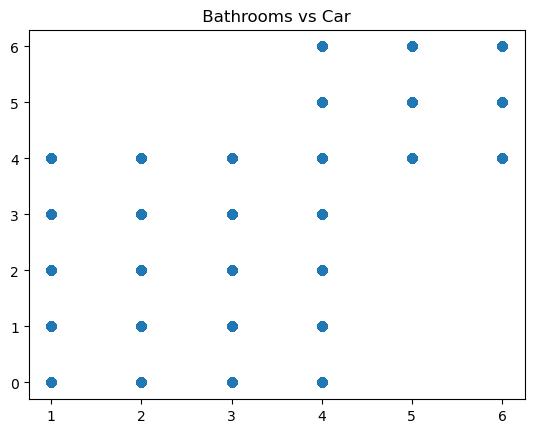

In [253]:
# bedroom bath room and car has hig correlation lets plot them and see
cols=('Bedrooms','Bathrooms','Car')
for idx in range(3):
  for idx1 in range(idx+1,3):
     column_name1 = cols[idx]
     column_name2 = cols[idx1]
     plt.scatter(cleaned_home_prices_df[column_name1], cleaned_home_prices_df[column_name2])
     plt.title(f' {column_name1} vs {column_name2} ')
     plt.show()

Text(0.5, 1.0, 'histogram of price')

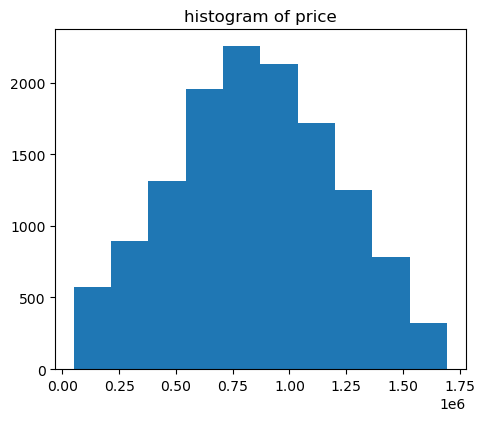

In [254]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(cleaned_home_prices_df["Price"])
plt.title("histogram of price")


In [255]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
jb_stats = jarque_bera(cleaned_home_prices_df["Price"])
norm_stats = normaltest(cleaned_home_prices_df["Price"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 203.9582965161614 and p value is 5.1406571765353766e-45
Normality test statistics is 446.1071126471122 and p value is 1.346081389217146e-97


In [256]:
# target is in the normal distribution
# but some features multi collinarity
# select features and target variable and prepare the train and test datasets , selecting 25% for test dataset
# `Y` is the target variable
Y = cleaned_home_prices_df['Price']
# `X` is the feature set 
X = cleaned_home_prices_df.drop(['Price'], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 465)

In [257]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9893 entries, 1839 to 5721
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    9893 non-null   float64
 1   Bathrooms   9893 non-null   float64
 2   Car         9893 non-null   float64
 3   sqm_house   9893 non-null   float64
 4   Balcony     9893 non-null   float64
 5   Year_built  9893 non-null   int64  
 6   Latitude    9893 non-null   float64
 7   Longitude   9893 non-null   float64
 8   Zipcode     9893 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 772.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 3298 entries, 8510 to 527
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    3298 non-null   float64
 1   Bathrooms   3298 non-null   float64
 2   Car         3298 non-null   float64
 3   sqm_house   3298 non-null   float64
 4   Balcony     3298 non-null   float64
 5 

## 4. Working with models,training and tuning

* I will start with linear regession simple model and try to tune parameters and measure the model performance
* I will also try lasso ridge regression techniques and see if the performance improves.

* Next I will try with ensemble model random forest regression to compare the model 

In [258]:
# build regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
# r_squared = r2_score(y_test, y_preds_test)
# print("R-squared:", r_squared)
def print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,regmodel):
 print("R-squared of the model on the training set is: {}".format(regmodel.score(X_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(regmodel.score(X_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,lrm)

R-squared of the model on the training set is: 0.6961638814912346
-----Test set statistics-----
R-squared of the model on the test set is: 0.6973755673157127
Mean absolute error of the prediction is: 120195.77350396554
Mean squared error of the prediction is: 39312951255.85947
Root mean squared error of the prediction is: 198274.93854710803
Mean absolute percentage error of the prediction is: 37.93927789783175


In [261]:
# try lasso 
from sklearn.linear_model import Lasso
# You are making predictions here
for alpha_val in (1,1.5,2,2.5,3,3.5,4):
  print(f" Lasso with alpha=10**{alpha_val}")
  lassoregr = Lasso(alpha=10**alpha_val)
  lassoregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,lassoregr.predict(X_train),lassoregr.predict(X_test),lassoregr)

 Lasso with alpha=10**1
R-squared of the model on the training set is: 0.6961629487643906
-----Test set statistics-----
R-squared of the model on the test set is: 0.6973849013714921
Mean absolute error of the prediction is: 120187.12719520667
Mean squared error of the prediction is: 39311738699.171234
Root mean squared error of the prediction is: 198271.88075763854
Mean absolute percentage error of the prediction is: 37.939135090804626
 Lasso with alpha=10**1.5
R-squared of the model on the training set is: 0.6961545546794805
-----Test set statistics-----
R-squared of the model on the test set is: 0.697398242617963
Mean absolute error of the prediction is: 120172.62994453248
Mean squared error of the prediction is: 39310005581.43336
Root mean squared error of the prediction is: 198267.51015089022
Mean absolute percentage error of the prediction is: 37.939416800248985
 Lasso with alpha=10**2
R-squared of the model on the training set is: 0.6961284680729491
-----Test set statistics-----


### model with alpha 10 ** 3 looks better with 
```
R-squared of the model on the training set is: 0.6961156222140552
-----Test set statistics-----
R-squared of the model on the test set is: 0.6974346781722558
Mean absolute error of the prediction is: 120062.6743563492
Mean squared error of the prediction is: 39305272357.624596
Root mean squared error of the prediction is: 198255.57333307076
Mean absolute percentage error of the prediction is: 37.94046059978476```

In [262]:
#ridge
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Here, `alpha` is the regularization
# parameter (usually called `lambda`). As `alpha` gets larger, parameter
# shrinkage grows more pronounced.
for alpha_val in (1,1.5,2,2.5,3,3.5,4,4.5,5):
  print(f" ridgeregr with alpha=10**{alpha_val}")
  ridgeregr = Ridge(alpha=10**alpha_val)
  ridgeregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,ridgeregr.predict(X_train),ridgeregr.predict(X_test),ridgeregr)


 ridgeregr with alpha=10**1
R-squared of the model on the training set is: 0.6961532641355921
-----Test set statistics-----
R-squared of the model on the test set is: 0.6973993837721845
Mean absolute error of the prediction is: 120170.44286466914
Mean squared error of the prediction is: 39309857337.81705
Root mean squared error of the prediction is: 198267.1363030622
Mean absolute percentage error of the prediction is: 37.93969359462773
 ridgeregr with alpha=10**1.5
R-squared of the model on the training set is: 0.6961415029042537
-----Test set statistics-----
R-squared of the model on the test set is: 0.6974037378364337
Mean absolute error of the prediction is: 120155.88224523548
Mean squared error of the prediction is: 39309291715.55689
Root mean squared error of the prediction is: 198265.70988337064
Mean absolute percentage error of the prediction is: 37.94076436416108
 ridgeregr with alpha=10**2
R-squared of the model on the training set is: 0.6961318727564294
-----Test set statist

#### Ridge with alpha 10 ** 2.5 looks better with 
```
R-squared of the model on the training set is: 0.696111981140558
-----Test set statistics-----
R-squared of the model on the test set is: 0.6974116084683974
Mean absolute error of the prediction is: 120028.71481507021
Mean squared error of the prediction is: 39308269267.474945
Root mean squared error of the prediction is: 198263.1313872424
Mean absolute percentage error of the prediction is: 37.9458507784573```

## Linear regression vs Lasso vs Ridge regressions

  Linear regression model perfomed better with r-square 0.7 , lasso and ridge regressions does not improve much on the model performance. So picking simple regular linear regression model in this comparisions.
  
```
R-squared of the model on the training set is: 0.6961638814912346
-----Test set statistics-----
R-squared of the model on the test set is: 0.6973755673157127
Mean absolute error of the prediction is: 120195.77350396554
Mean squared error of the prediction is: 39312951255.85947
Root mean squared error of the prediction is: 198274.93854710803
Mean absolute percentage error of the prediction is: 37.93927789783175```

### Trying the RandomForestRegressor to predict the house price

In [264]:
# random forest with default parameters
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

R-squared of the model on the training set is: 0.9738646987242756
-----Test set statistics-----
R-squared of the model on the test set is: 0.8145959049301251
Mean absolute error of the prediction is: 77500.10785930869
Mean squared error of the prediction is: 24085240201.74783
Root mean squared error of the prediction is: 155194.2015725711
Mean absolute percentage error of the prediction is: 28.13413986332464


#### this model performed lot better than linear regression with r square on training data is at .97 and test data at 0.81. 
  The model loos overfit as the performance on training dataset is better compared to test dataset


In [265]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression try to run with estimators tuning
for n in range(50,200,10):
 print(f'running with {n} estimators')
 rf_model = RandomForestRegressor(n_estimators=n, random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 50 estimators
R-squared of the model on the training set is: 0.9725830561497637
-----Test set statistics-----
R-squared of the model on the test set is: 0.8165729032414297
Mean absolute error of the prediction is: 76864.94556094603
Mean squared error of the prediction is: 23828414810.764565
Root mean squared error of the prediction is: 154364.55166509104
Mean absolute percentage error of the prediction is: 27.616799797067042
running with 60 estimators
R-squared of the model on the training set is: 0.973032922082416
-----Test set statistics-----
R-squared of the model on the test set is: 0.8169609319407518
Mean absolute error of the prediction is: 76621.17687992722
Mean squared error of the prediction is: 23778007270.279423
Root mean squared error of the prediction is: 154201.190884764
Mean absolute percentage error of the prediction is: 27.63833291935809
running with 70 estimators
R-squared of the model on the training set is: 0.9731502362487361
-----Test set statistics---

### From above , there is not much improvement in the model with increase in estimators , so I think we can select balanced number of estimators as 100

In [267]:
# it is time to tune the model fit with tuning max_depth
for n in range(1,20,1):
 print(f'running with {n} depth')
 rf_model = RandomForestRegressor(
     n_estimators= 100,
     max_depth=n)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 1 depth
R-squared of the model on the training set is: 0.36914695998371105
-----Test set statistics-----
R-squared of the model on the test set is: 0.3511362748247697
Mean absolute error of the prediction is: 227127.9674007923
Mean squared error of the prediction is: 84291766442.14053
Root mean squared error of the prediction is: 290330.44353312405
Mean absolute percentage error of the prediction is: 56.68048761836256
running with 2 depth
R-squared of the model on the training set is: 0.5735942665492539
-----Test set statistics-----
R-squared of the model on the test set is: 0.5584486926406512
Mean absolute error of the prediction is: 186308.40859161658
Mean squared error of the prediction is: 57360487615.646484
Root mean squared error of the prediction is: 239500.49606555406
Mean absolute percentage error of the prediction is: 48.510615904218476
running with 3 depth
R-squared of the model on the training set is: 0.6651613454424887
-----Test set statistics-----
R-squared o

#### Random Forest model
  It is interesting that the increase in estimators is improving the performance of the model, but the improvement is not much great from 50 estimators to 190 estimators. To balance we can try to select the estimators with 100. Also to aviod overfit of the model, above we worked on tuning the max depth. the model is optimum at max depth 8. From 1 to 8 tree depth the model is improving , and after this point it became more complex and trying to overfit the model to training data. So the best fit model I select is with depth 8.
  ```
R-squared of the model on the training set is: 0.8351272662885693
-----Test set statistics-----
R-squared of the model on the test set is: 0.8013931677644541
Mean absolute error of the prediction is: 89533.07527459816
Mean squared error of the prediction is: 25800364648.35666
Root mean squared error of the prediction is: 160624.91913883307
Mean absolute percentage error of the prediction is: 30.583930927790163

## Summary 

   I tried multiple regression models, started with simple linear regression and the model MAE, MSE are 120195, 39312951255 which are high and , R² is at .696. Overall its performance is just ok at .697 R² on test and train datasets, later tried to add lasso and ridge regression. There is no significant improvement in them compared to linear regression. 

   Later I tried with enseble model of random forest regressor, this model taking time to run compared to linear regression, but the performance of the model is drastically improved and it is in acceptable ranges with MAE, MSE are at 89533  and 25800364648 and the training set is 0.835 and test set is 0.801. This model perfromance looks better overall.
   #### From above analysis I will select the random forest regressor model with 100 estimators and depth 15 to accurately predict the houseprice

